# Project 1: SAT & ACT Analysis

## Problem Statement:

The project aim is to analyse the SAT and ACT scores and participation rates from each state in the United States and identifying the key factors which can influence to increase the SAT participation rate in some the states.

## Executive Summary
To investigate the SAT participation rate and what Strategies College board should implement to  improved the SAT participation rate across US year on year. We have taken 2017 and 2018  ACT and SAT datasets to do data analysis and to come up with the factors which can help to improve the SAT participation rate in some of the States.
This project aims to analyse the data with some outside research to identify the drivers behind participation rates and scores in various states.

### Contents:
- [Data Import and Cleaning](#SAT and ACT test data sets are given for 2017 & 2018)
- [Data Dictionary](#Type and description of datasets)
- [Exploratory Data Analysis](#To find the states with highest and lowerst test results)
- [Visualize the data](#Inferences from the graphs)
- [Descriptive and Inferetial Statistics](#Inferential Analysis)
- [Outside Research](#Some findings from outside research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Reas the dataset
data_sat_17= pd.read_csv('../data/sat_2017.csv')
data_sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [3]:
data_act_17 = pd.read_csv('../data/act_2017.csv')
data_act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#
data_sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
data_act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Verbally Describe Data

- SAT and ACT are exam data with all 51 states and participation percentage ranges from 0-100
- SAT test on (Evidence based reading and writing and Math) -  min value 200 - max value 800
- ACT test on MATH, Reading,English and Science - with Composite score - Each test range from  (1-36)

#### 4a. Does the data look complete? 

In [6]:
data_act_17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [7]:
data_sat_17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### DATA has no null values and it looks complete

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [8]:
# To find the outlier or Science min value of 2.3
data_act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [9]:
data_sat_17.describe() # To confirm that min and max values don't have any outliers 

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Answer:

SAT: The minimum possible value for the SAT is 200 points on Math and 200 on Evidence-Based Reading and Writing, while the maximum possible value is 800 per subject area. However, the SAT dataframe shows a minimum test score of 52 for Math. This could be due to wrong input of data

ACT: The minimum possible test score for each subject area (English, Reading, Math, Science) in the ACT is 1, while the maximum score is 36. The composite is the average of the four subject area scores. Hence, the the minimum possible composite score is 1 and the maximum score is 36.
With the describe observation, the minimum score for ACT Science is 2.3, which is much lower than the minimum scores observed for English (16.3), Math (18) and Reading (18.1). This could be due to wrong input of data. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
# Find the wrong entered value for Science
data_act_17.loc[data_act_17['Science']== 2.3,:]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [11]:
# Corrected the data error for Maryland's ACT Science score based on the data given 
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
data_act_17.loc[data_act_17['Science']== 2.3,'Science'] = 23.2

In [12]:
data_act_17[data_act_17['State']=='Maryland'] # To double confirm the value replaced

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [13]:
data_sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [14]:
#Finding the row with the minimum Math score on the SAT dataframe
min_math_sat = data_sat_17[data_sat_17['Math'] == data_sat_17['Math'].min()]
min_math_sat

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [15]:
#Finding the correct math score 
math_score_correct = int(min_math_sat['Total'] - min_math_sat['Evidence-Based Reading and Writing'])
math_score_correct

524

In [16]:
# replacing the math score with correct value and validating on the score
data_sat_17.iloc[20,3]=524
data_sat_17.iloc[20,:]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [17]:
data_act_17.describe() # To confirm that min and max values don't have any outliers 

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


In [18]:
data_sat_17.describe() # To confirm that min and max values don't have any outliers 

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
#printing the datatypes of SAT data
print('SAT datatype', data_sat_17.dtypes)

SAT datatype State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


In [20]:
#printing the datatypes of ACT data
print('ACT datatype', data_act_17.dtypes)

ACT datatype State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
- The 'Composite' score in the ACT dataframe should be float type instead of an object type- it is an average of the 4 individual test scores. We will look into the datapoints to check on this error.
- The participation scores in both the SAT and ACT are showing as an object because of '%' symbol. Converting the participation score to float - this will allow us to use the data as numerical data for data analysis purpose.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
data_act_17['Participation'].head() # To check the reason why Participation in object type

0     60%
1    100%
2     65%
3     62%
4    100%
Name: Participation, dtype: object

In [22]:
# Define a function to replace % to ''
def percentage_num(value):
    return (float(value.replace('%','')))

In [23]:
data_sat_17['Participation'] = data_sat_17['Participation'].map(percentage_num) # Convert SAT participation to float 

In [24]:
data_act_17['Participation'] = data_act_17['Participation'].map(lambda x: float(x.replace('%',''))) # Convert ACT participation to float

- Fix any individual values preventing other columns from being the appropriate type.

In [25]:
# To find the outlier in composite data 
data_act_17[data_act_17['Composite']=='20.2x'] 

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


In [26]:
data_act_17.loc[51,'Composite'] =20.2 # Change the 20.2x to 20.2

In [27]:
data_act_17.loc[51,'Composite'] # Confirm the change 

20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [28]:
#Changed the Composite column to float typr 
data_act_17['Composite'] = data_act_17['Composite'].map(lambda x:float(x))

- Display the data types again to confirm they are correct.

In [29]:
#To find the Datatype of ACT 2017
print('Data typy of ACT', data_act_17.dtypes)

Data typy of ACT State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [30]:
#To confirm the right Data type of SAT 2017
print('Data type of SAT', data_sat_17.dtypes)

Data type of SAT State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [31]:
#To rename the columns with the dataframes name and year 
data_sat_17.rename(columns= {'State':'state',
                             'Participation':'sat_part_17',
                             'Evidence-Based Reading and Writing' :'sat_erw_17',
                              'Math':'sat_math_17', 
                               'Total':'sat_total_17'} , inplace = True)
data_act_17.rename(columns={'State':'state','Participation':'act_part_17',
                            'English': 'act_english_17',
                            'Math' :'act_math_17',
                            'Reading' : 'act_reading_17',
                            'Science' :'act_science_17',
                            'Composite' : 'act_composite_17'}, inplace = True)

In [32]:
data_sat_17.head() # To confirm the change SAT

,state,sat_part_17,sat_erw_17,sat_math_17,sat_total_17
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [33]:
data_act_17.head() # Confirm the change in ACT

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|Value Range|
|---|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| Min&Max range|
|**state**|*object*| SAT / ACT | 51 states in USA |NA|
|**sat_part_17**|*float*| SAT | Percentage of students who all have taken SAT Test |0-100%|
|**sat_erw_17**|*int*| SAT | Score for "Evidence-Based Reading and Writing" |200-800 |
|**sat_math_17**|*int*| SAT |  Score for Math |200-800 |
|**sat_total_17**|*int*| SAT | Total score for SAT Test |0-1600|
|**act_part_17**|*float*| ACT | Percentage of high students who all have taken ACT Test|0-100% |
|**act_english_17**|*float*| ACT | Score for English|1-36 |
|**act_math_17**|*float*| ACT | Score for Math|1-36 |
|**act_reading_17**|*float*| ACT | Composite score for Reading|1-36 |
|**act_science_17**|*float*| ACT | Composite score for Science|1-36|
|**act_composite_17**|*float*| ACT | Composite score for ACT Test|1-36 |

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [34]:
data_act_17.head() # To check the extra row to be removed 

,state,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [35]:
# Drop the row of National which is national average 
data_act_17.drop(0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [36]:
# ACT and SAT combined using panda merge command 
act_sat_17 = pd.merge(data_sat_17,data_act_17)
act_sat_17.head(10)

,state,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [37]:
#To save the cleaned merge data to csv file 
act_sat_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [38]:
# To read the ACT and SAT 2018 from the csv file 
act_18 = pd.read_csv('../data/act_2018_updated.csv')
sat_18 = pd.read_csv('../data/sat_2018.csv')

In [39]:
sat_18.head() # to check the date 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
# Convert the participation to number 
sat_18['Participation'] = sat_18['Participation'].map(percentage_num) 

In [41]:
act_18.head() # To check the data

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [42]:
# To confirm the change in Participation data 
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [43]:
sat_18.describe() # to confirm whether there are any outliers in the dataframe

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [44]:
sat_18.describe() # To confirm whether there are any outliers in the dataframe

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [45]:
# Rename to lower case and easy to read column title
sat_18.rename(columns= {'State': 'state',
                             'Participation':'sat_part_18',
                             'Evidence-Based Reading and Writing' :'sat_erw_18',
                              'Math':'sat_math_18', 
                               'Total':'sat_total_18'} , inplace = True)
act_18.rename(columns= {'State' : 'state',
                            'Percentage of Students Tested':'act_part_18',
                            'Average English Score': 'act_english_18',
                            'Average Math Score' :'act_math_18',
                            'Average Reading Score' : 'act_reading_18',
                            'Average Science Score' :'act_science_18',
                            'Average Composite Score' : 'act_composite_18'}, inplace = True)

In [46]:
sat_18.head()  # To confirm the changes

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [47]:
act_18.head() # To confirm the changes

,state,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [48]:
act_sat_18 = pd.merge(sat_18,act_18) # Merge ACT and SAT 2018 dataframe 
act_sat_18.head(10)

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,100.0,519,506,1025,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,535,519,1053,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,505,492,998,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,92.0,497,480,977,32,23.6,23.7,22.7,24.4,23.0
9,Florida,56.0,550,549,1099,66,19.9,19.2,19.3,21.1,19.5


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [49]:
final =pd.merge(act_sat_18,act_sat_17) # combine the Dataframe for the final visualization and plotting of graphs

In [50]:
final.head()

,state,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,...,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,6.0,595,571,1166,100,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [51]:
# Set index as State
final.set_index('state', inplace=True)

In [52]:
final.to_csv('../data/final.csv',index=False) # Saving the final database to final.csv

## Data dictionary for final dataframe

|Feature|Type|Dataset|Description|Value Range|
|---|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| Min&Max range|
|**state**|*object*| SAT / ACT | 51 states in USA |NA|
|**sat_part_17**|*float*| SAT | Percentage of students who all have taken SAT Test |0-100%|
|**sat_erw_17**|*int*| SAT | Score for "Evidence-Based Reading and Writing" |200-800 |
|**sat_math_17**|*int*| SAT |  Score for Math |200-800 |
|**sat_total_17**|*int*| SAT | Total score for SAT Test |0-1600|
|**act_part_17**|*float*| ACT | Percentage of high students who all have taken ACT Test|0-100% |
|**act_english_17**|*float*| ACT | Score for English|1-36 |
|**act_math_17**|*float*| ACT | Score for Math|1-36 |
|**act_reading_17**|*float*| ACT | Composite score for Reading|1-36 |
|**act_science_17**|*float*| ACT | Composite score for Science|1-36|
|**act_composite_17**|*float*| ACT | Composite score for ACT Test|1-36 |
|**sat_part_18**|*float*| SAT | Percentage of students who all have taken SAT Test|0-100% |
|**sat_erw_18**|*int*| SAT | Score for "Evidence-Based Reading and Writing" |200-800 |
|**sat_math_18**|*int*| SAT |  Score for Math |200-800 |
|**sat_total_18**|*int*| SAT | Total score for SAT Test |0-1600 |
|**act_part_18**|*float*| ACT | Percentage of high students who all have taken ACT Test| 0-100%|
|**act_english_18**|*float*| ACT | Score for English |1-36|
|**act_math_18**|*float*| ACT | Score for Math |1-36|
|**act_reading_18**|*float*| ACT | Composite score for Reading |1-36|
|**act_science_18**|*float*| ACT | Composite score for Science |1-36|
|**act_composite_18**|*float*| ACT | Composite score for ACT Test |1-36|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
#To check the statistics of all the numeric features 
final.describe()

,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [54]:
#Transposed to see the values of each features 
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_erw_18,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_math_18,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_total_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_part_18,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act_english_18,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act_math_18,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act_reading_18,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act_science_18,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
#Function to calculate the standard deviation 
def std_dev(lst):
    n = len(lst)
    mean = np.mean(lst)
    total = 0
    
    for x in lst:
        total += (x-mean)**2
        
    st_dev = np.sqrt(total/n)   
    
    return st_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [56]:
final.describe() # To check the final dataframe

,sat_part_18,sat_erw_18,sat_math_18,sat_total_18,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_17,sat_erw_17,sat_math_17,sat_total_17,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [57]:
# Dictionary comprehension to apply standard dev to column of the dictionary with key as column name
sd = {col: round(std_dev(final[col]),2) for col in final.columns[1:] }

In [58]:
sd # check the satndard deviation dictionary 

{'sat_erw_18': 47.03,
 'sat_math_18': 47.3,
 'sat_total_18': 93.23,
 'act_part_18': 33.75,
 'act_composite_18': 2.09,
 'act_english_18': 2.42,
 'act_math_18': 2.02,
 'act_reading_18': 2.15,
 'act_science_18': 1.85,
 'sat_part_17': 34.93,
 'sat_erw_17': 45.22,
 'sat_math_17': 46.66,
 'sat_total_17': 91.58,
 'act_part_17': 31.82,
 'act_english_17': 2.33,
 'act_math_17': 1.96,
 'act_reading_17': 2.05,
 'act_science_17': 1.72,
 'act_composite_17': 2.0}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
The manually calculated standard deviations do not match up with output from pandas' describe. This is because of the difference in degrees of freedom used. Manual calculation of the standard deviation uses a divisor of N, where N is the number of values. On the other hand, the pandas version calculates using the sample standard deviation which has a divisor of N-1. Numpy's std method matches that of the manually calculated standard deviations.

In [59]:
np.std(final['sat_part_18']) # To find the standard deviation of SAT_participation using numpy 

36.946619223539415

In [60]:
#Manually calculated std dev does not match with panda's std dev when default ddof=1
final.describe().T['std']

sat_part_18         37.314256
sat_erw_18          47.502627
sat_math_18         47.772623
sat_total_18        94.155083
act_part_18         34.080976
act_composite_18     2.106278
act_english_18       2.446356
act_math_18          2.035765
act_reading_18       2.167245
act_science_18       1.870114
sat_part_17         35.276632
sat_erw_17          45.666901
sat_math_17         47.121395
sat_total_17        92.494812
act_part_17         32.140842
act_english_17       2.353677
act_math_17          1.981989
act_reading_17       2.067271
act_science_17       1.739353
act_composite_17     2.020695
Name: std, dtype: float64

In [61]:
#Manually calculated std dev matches when the when ddof=0
final.std(ddof=0)

sat_part_18         36.946619
sat_erw_18          47.034610
sat_math_18         47.301946
sat_total_18        93.227424
act_part_18         33.745195
act_composite_18     2.085526
act_english_18       2.422254
act_math_18          2.015707
act_reading_18       2.145892
act_science_18       1.851689
sat_part_17         34.929071
sat_erw_17          45.216970
sat_math_17         46.657134
sat_total_17        91.583511
act_part_17         31.824176
act_english_17       2.330488
act_math_17          1.962462
act_reading_17       2.046903
act_science_17       1.722216
act_composite_17     2.000786
dtype: float64

In [62]:
#Manually calculated std dev matches when the when ddof=0
final.std(ddof=1)

sat_part_18         37.314256
sat_erw_18          47.502627
sat_math_18         47.772623
sat_total_18        94.155083
act_part_18         34.080976
act_composite_18     2.106278
act_english_18       2.446356
act_math_18          2.035765
act_reading_18       2.167245
act_science_18       1.870114
sat_part_17         35.276632
sat_erw_17          45.666901
sat_math_17         47.121395
sat_total_17        92.494812
act_part_17         32.140842
act_english_17       2.353677
act_math_17          1.981989
act_reading_17       2.067271
act_science_17       1.739353
act_composite_17     2.020695
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT? 
    - 2017 ACT? 
    - 2018 ACT? 
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

|**Highest Participation Rate**|

- 2017 SAT: District of Columbia, Michigan, Connecticut, Delaware, New Hampshire
- 2018 SAT: Colorado,Connecticut,Delaware,Michigan,Idaho
- 2017 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,          Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas	
- 2018 ACT: Alabama, Kentucky, Wisconsin, Utah, Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,     Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas

|**Lowest Participation Rate**]

- 2017 SAT: Arkansas,Wyoming,North Dakota,Mississippi,Iowa
- 2018 SAT: Mississippi,Iowa,Wisconsin,Wyoming,North Dakota
- 2017 ACT: Pennsylvania,Rhode Island,Delaware,New Hampshire,Maine
- 2018 ACT: Pennsylvania,Delaware,New Hampshire,Rhode Island,Maine

|**Highest Total/Composite Rate**|

- 2017 SAT: Minnesota, Wisconsin, Iowa, Missouri, Kansas
- 2018 SAT: Minnesota, Wisconsin, North Dakota, Iowa, Kansas
- 2017 ACT: New Hampshire, Massachusetts, Connecticut, Maine, District of Columbia,
- 2018 ACT: Connecticut, Massachusetts, New Hampshire, New York, Michigan

|**Lowest Total/Composite Rate**|

- 2017 SAT: District of Columbia,Delaware,Michigan,Idaho,Maine
- 2018 SAT: District of Columbia, Delaware, West Virginia, Idaho, Hawaii
- 2017 ACT: Nevada, Mississippi, South Carolina, Hawaii, North Carolina
- 2018 ACT: Nevada, South Carolina, Mississippi, Hawaii, Alabama

|**Do any states with 100% participation on a given test have a rate change year-to-year?**|

 - District of Columbia participation rate changed to less than 100% in 2018 whereas Colorado and Idaho increased to 100% in    2018 
 
|**Do any states show have >50% participation on *both* tests either year?**|
   
    - Georgia
    - Hawaii
    - Florida




In [63]:
#Sorting the maxvalues based on the participation rate of SAT 2017 and SAT 2018
part_sat_17 = final.sort_values(['sat_part_17'], ascending=False)
part_sat_17['sat_part_17'].head(5)

state
District of Columbia    100.0
Michigan                100.0
Connecticut             100.0
Delaware                100.0
New Hampshire            96.0
Name: sat_part_17, dtype: float64

In [64]:
part_sat_17['sat_part_17'].tail(5)

state
Arkansas        3.0
Wyoming         3.0
North Dakota    2.0
Mississippi     2.0
Iowa            2.0
Name: sat_part_17, dtype: float64

#### |**2017 SAT**|:
- North Dakota, Mississippi and Iowa have the lowest participation rates (2%).
- Michigan, District of Columbia, Delaware and Connecticut have the highest participation rates (100%)

In [65]:
#Sorting the max values based on the participation rate of SAT 2018
part_sat_18 = final.sort_values(['sat_part_18'], ascending=False)
part_sat_18['sat_part_18'].head(5)

state
Colorado       100.0
Connecticut    100.0
Delaware       100.0
Michigan       100.0
Idaho          100.0
Name: sat_part_18, dtype: float64

In [66]:
part_sat_18['sat_part_18'].tail(5)

state
Mississippi     3.0
Iowa            3.0
Wisconsin       3.0
Wyoming         3.0
North Dakota    2.0
Name: sat_part_18, dtype: float64

|**2018 SAT**|
- North Dakota has the lowest participation rate (2%), Wyoming,Winconsin,Iowa and Missossoppi participation rate (3%)
- Colorado, Connecticut, Delaware, Michigan, Idaho have the highest participation rates(100%).

In [67]:
#Sorting the max values based on the participation rate of ACT 2017
part_act_17 = final.sort_values(['act_part_17'], ascending=False)
part_act_17['act_part_17'].head(18)

state
Alabama           100.0
Kentucky          100.0
Wisconsin         100.0
Utah              100.0
Tennessee         100.0
South Carolina    100.0
Oklahoma          100.0
North Carolina    100.0
Nevada            100.0
Montana           100.0
Mississippi       100.0
Minnesota         100.0
Louisiana         100.0
Missouri          100.0
Wyoming           100.0
Colorado          100.0
Arkansas          100.0
North Dakota       98.0
Name: act_part_17, dtype: float64

In [68]:
part_act_17['act_part_17'].tail(5)

state
Pennsylvania     23.0
Rhode Island     21.0
Delaware         18.0
New Hampshire    18.0
Maine             8.0
Name: act_part_17, dtype: float64

|**2017 ACT**|:
- Maine has the lowest participation rate (8%).
- South Carolina, Utah, Tennessee, Alabama, Missouri, North Carolina, Nevada, Montana,Wisconsin, Mississippi, Minnesota, Louisiana, Kentucky, Colorado, Arkansas, Oklahoma, Wyoming have the highest participation rates (100%)

In [69]:
#Sorting the max values based on the participation rate of ACT 2018
part_act_18 = final.sort_values(['act_part_18'], ascending=False)
part_act_18['act_part_18'].head(17)

state
Alabama           100
Kentucky          100
Wisconsin         100
Utah              100
Tennessee         100
South Carolina    100
Ohio              100
Oklahoma          100
North Carolina    100
Nevada            100
Nebraska          100
Montana           100
Mississippi       100
Louisiana         100
Missouri          100
Wyoming           100
Arkansas          100
Name: act_part_18, dtype: int64

In [70]:
part_act_18['act_part_18'].tail(5)

state
Pennsylvania     20
Delaware         17
New Hampshire    16
Rhode Island     15
Maine             7
Name: act_part_18, dtype: int64

|**2018 ACT**|: 
- Maine has the lowest participation rate(7%).
- Utah, Tennessee, South Carolina, Alabama, Missouri, Ohio, North Carolina, Nevada, Nebraska, Montana, Wisconsin, Mississippi, Louisiana, Kentucky, Arkansas, Oklahoma, Wyoming have the highest participation rates (100%).

In [71]:
#Finding the max and min of ACT 2018 composite
print(final[final['act_composite_17'] == final['act_composite_17'].min()]['act_composite_17'])
print(final[final['act_composite_17'] == final['act_composite_17'].max()]['act_composite_17'])

state
Nevada    17.8
Name: act_composite_17, dtype: float64
state
New Hampshire    25.5
Name: act_composite_17, dtype: float64


#### 2017 ACT composite score: 
Nevada has the lowest composite score while New Hampshire has the highest.

In [72]:
#Finding the max and min of ACT 2018 composite
print(final[final['act_composite_18'] == final['act_composite_18'].min()]['act_composite_18'])
print(final[final['act_composite_18'] == final['act_composite_18'].max()]['act_composite_18'])

state
Nevada    17.7
Name: act_composite_18, dtype: float64
state
Connecticut    25.6
Name: act_composite_18, dtype: float64


#### 2018 ACT composite score:
Nevada has the lowest composite score while Connecticut has the highest.

In [73]:
#Finding the max and min of SAT 2017 composite
print(final[final['sat_total_17'] == final['sat_total_17'].min()]['sat_total_17'])
print(final[final['sat_total_17'] == final['sat_total_17'].max()]['sat_total_17'])

state
District of Columbia    950
Name: sat_total_17, dtype: int64
state
Minnesota    1295
Name: sat_total_17, dtype: int64


#### 2017 SAT
- Total score lowest in District of Columbia
- Highest in Minnesota

In [74]:
#Finding the max and min of SAT 2017 composite
print(final[final['sat_total_18'] == final['sat_total_18'].min()]['sat_total_18'])
print(final[final['sat_total_18'] == final['sat_total_18'].max()]['sat_total_18'])

state
District of Columbia    977
Name: sat_total_18, dtype: int64
state
Minnesota    1298
Name: sat_total_18, dtype: int64


#### 2018 SAT
- Total score lowest in District of Columbia
- Highest in Minnesota

#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [75]:
# Finding the states with 100% participation rate change year to year 
final[(final['sat_part_17'] == 100) & (final['sat_part_18'] <100)][['sat_part_17','sat_part_18']] 

,sat_part_17,sat_part_18
state,,
District of Columbia,100.0,92.0


In [76]:
# Finding the states with 100% participation rate change year to year 
final[(final['sat_part_18'] == 100) & (final['sat_part_17'] <100)][['sat_part_17','sat_part_18']] 

,sat_part_17,sat_part_18
state,,
Colorado,11.0,100.0
Idaho,93.0,100.0


#### findings:
- District of Columbia participation rate changed to 92%
- Colorado  participation rate increased drastically from 11 to 100% so there is change of 89%
- Idaho particiaption rate increased to 100 % from 93% - there is change of 7%

In [77]:
# Finding the states with 100% participation rate change year to year 
final[(final['act_part_17'] == 100) & (final['act_part_18'] <100)][['act_part_17','act_part_18']] 

,act_part_17,act_part_18
state,,
Colorado,100.0,30
Minnesota,100.0,99


In [78]:
# Finding the states with 100% participation rate change year to year 
final[(final['act_part_18'] == 100) & (final['act_part_17'] <100)][['act_part_17','act_part_18']] 

,act_part_17,act_part_18
state,,
Nebraska,84.0,100
Ohio,75.0,100


#### findings:
- Nebraska and Ohio increased to 100% 
- Colorado  participation rate reduced drastically from 100 to 30% which is 70% reduction 
- Idaho particiaption rate incr eased to 100 % from 93% - there is change of 7%

### Do any states show have >50% participation on both tests either year?

In [79]:
final[(final['sat_part_17']> 50) & (final['act_part_17']> 50)][['sat_part_17','act_part_17']]

,sat_part_17,act_part_17
state,,
Florida,83.0,73.0
Georgia,61.0,55.0
Hawaii,55.0,90.0


In [80]:
final[(final['sat_part_18']> 50) & (final['act_part_18']> 50)][['sat_part_17','act_part_17']]

,sat_part_17,act_part_17
state,,
Florida,83.0,73.0
Georgia,61.0,55.0
Hawaii,55.0,90.0
North Carolina,49.0,100.0
South Carolina,50.0,100.0


#### Findings:
- Florida, Georgia and Hawaii have attained > 50% participation on both the ACT and SAT in 2017.
- Florida, Georgia, Hawaii, North and South Carolina have attained > 50% participation on both tests in 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

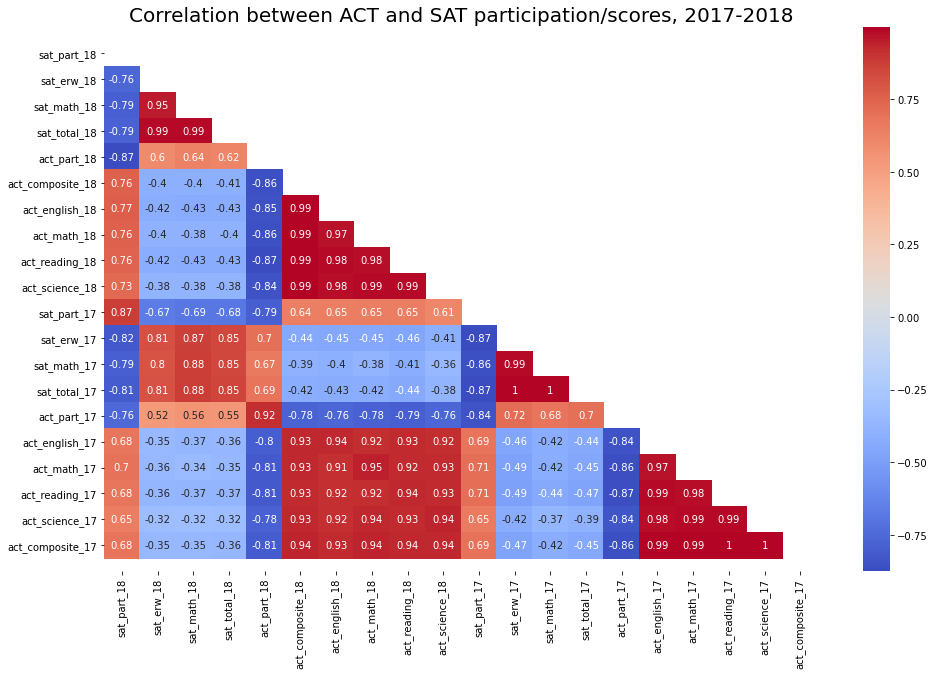

In [81]:
plt.figure(figsize=(16,10))
matrix = np.triu(final.corr())
ax = sns.heatmap(final.corr(), annot=True, mask=matrix, cmap ='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation between ACT and SAT participation/scores, 2017-2018', fontsize=20);

|**Observations**|

- We observe a strong, negative correlation between ACT and SAT participation rates, -0.84 in 2017 and -0.87 in 2018. 
We can say from this that in states where the ACT participation rate is high, its SAT participation rate would be low.

-  There is also a negative correlation between scores and participation rates. For instance, the correlation between the     2018 SAT participation and total score was -0.79. States that require mandatory testing will see high participation rates but lower mean scores as a result of a wider range of scorers.

- States where standardised testing is not mandatory, students that are more academically-inclined or self-motivated will register for these tests voluntarily. As they are more likely to be well prepared for the test, we will see a large proportion of high scorers.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [82]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_colors):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color=list_of_colors[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[0])
        ax[i].set_ylabel('Frequency')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<Figure size 720x720 with 0 Axes>

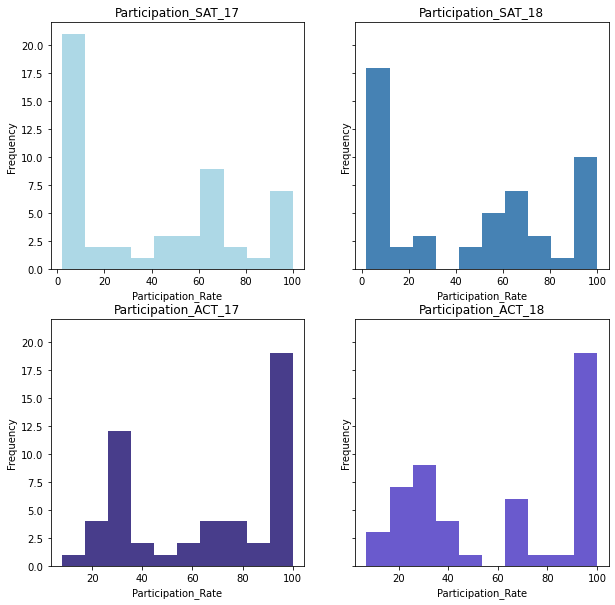

In [83]:
# Participation rates for SAT & ACT
plt.figure(figsize=(10,10))
columns = ['sat_part_17','sat_part_18','act_part_17','act_part_18']
titles = ['Participation_SAT_17','Participation_SAT_18', 'Participation_ACT_17','Participation_ACT_18']
xlabels = ['Participation_Rate']
colors = ['lightblue', 'steelblue', 'darkslateblue', 'slateblue']
subplot_histograms(final,columns, titles,xlabels,colors);

|**Observation**|

Both the ACT and SAT participation rates in 2017 and 2018 observe a bimodal distribution with two peaks, one at the upper range and another at the lower range of the participation rate.
- Compared to 2017, the participation rate in the number of states attained to 90-100% in 2018.
- This suggest some state has chosen the SAT as their mandatory standardised test in 2018.

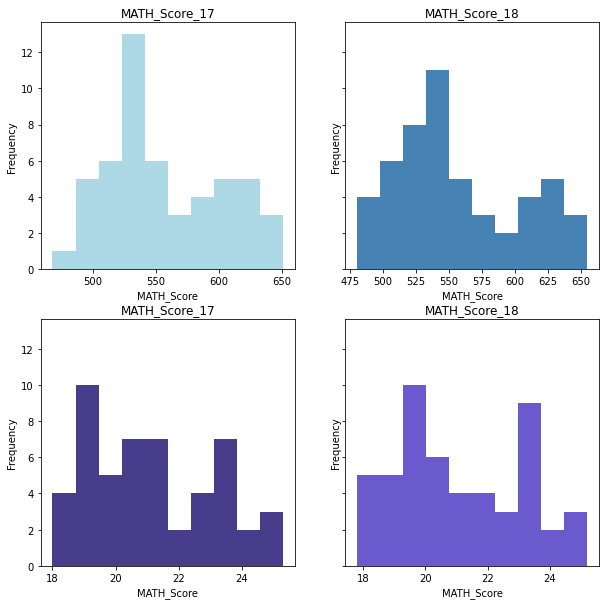

In [84]:
# Math scores for SAT & ACT
columns = ['sat_math_17','sat_math_18','act_math_17','act_math_18']
titles = ['MATH_Score_17','MATH_Score_18', 'MATH_Score_17','MATH_Score_18']
xlabels = ['MATH_Score']
colors = ['lightblue', 'steelblue', 'darkslateblue', 'slateblue']
subplot_histograms(final,columns, titles,xlabels,colors);

|**Observation**|
The SAT Math scores have a more distinct peak than ACT. No significant year-to-year shift in the Math score.

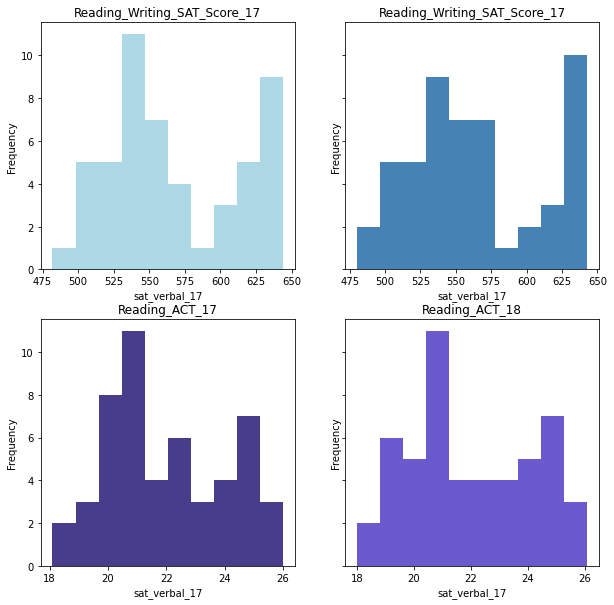

In [85]:
#Reading/verbal scores for SAT & ACT

columns = ['sat_erw_17','sat_erw_18','act_reading_17','act_reading_18']
titles = ['Reading_Writing_SAT_Score_17','Reading_Writing_SAT_Score_17', 'Reading_ACT_17','Reading_ACT_18']
xlabels = ['sat_verbal_17','sat_verbal_18','act_reading_17','act_reading_18']
colors = ['lightblue', 'steelblue', 'darkslateblue', 'slateblue']
subplot_histograms(final,columns, titles,xlabels,colors);

|**Observation**|:
- The ACT and SAT reading/verbal scores all exhibit a bimodal distribution.There is no significant changes in the distribution between 2017 and 2018. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [86]:
# Define a function for a scatter plot
def plot_scatter(df,x,y,title,xlabel,ylabel, color):
    plt.title(title,fontsize =20)
    plt.scatter(df[x],df[y],color=color);
    sns.regplot(df[x], df[y], color=color)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize =15)

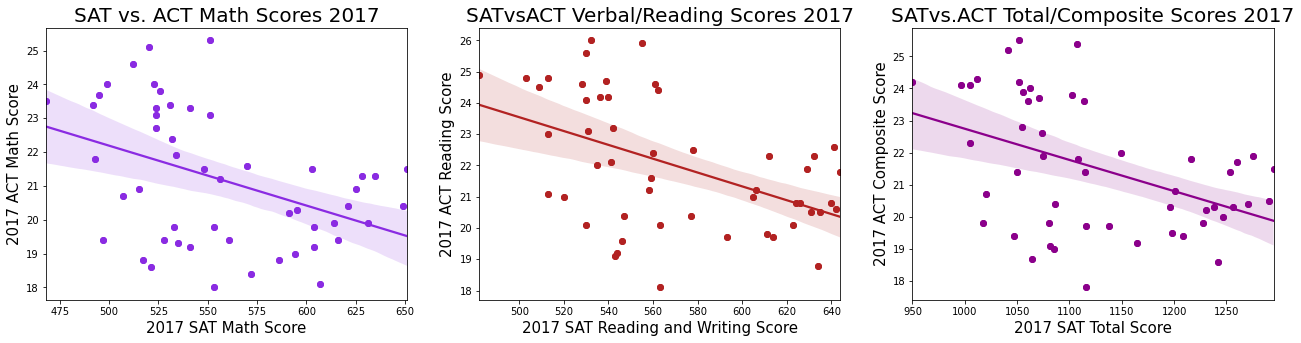

In [87]:
# SAT vs. ACT math scores for 2017
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plot_scatter(df=final, 
             x='sat_math_17', 
             y='act_math_17', 
             title='SAT vs. ACT Math Scores 2017', 
             xlabel='2017 SAT Math Score', 
             ylabel='2017 ACT Math Score',
             color='blueviolet')

# SAT vs. ACT verbal/reading scores for 2017
plt.subplot(1,3,2)
plot_scatter(df=final, 
             x='sat_erw_17', 
             y='act_reading_17', 
             title='SATvsACT Verbal/Reading Scores 2017', 
             xlabel='2017 SAT Reading and Writing Score', 
             ylabel='2017 ACT Reading Score',
             color='firebrick')

# SAT vs. ACT total/composite scores for 2017
plt.subplot(1,3,3)
plot_scatter(df=final, 
             x='sat_total_17', 
             y='act_composite_17', 
             title='SATvs.ACT Total/Composite Scores 2017', 
             xlabel='2017 SAT Total Score', 
             ylabel='2017 ACT Composite Score',
             color='darkmagenta')

|**Observation**|

- We can see negative relationship between each tests' sections. I
- A state with a high mean score on the SAT Math component will see a low mean score on its ACT Math component.
- The state's mandatory testing requrement is the key over here. 
- We have previously seen tthe negative correlation between participation rates and mean scores. If the state's mandate was for all high school students to sit for the ACT instead of the SAT, we will observe a high participation rate but a low mean score on the ACT. 
- Those state where student's are voluntarily registered for the SAT are likely to be well prepared and thus drive up the mean score the SAT.

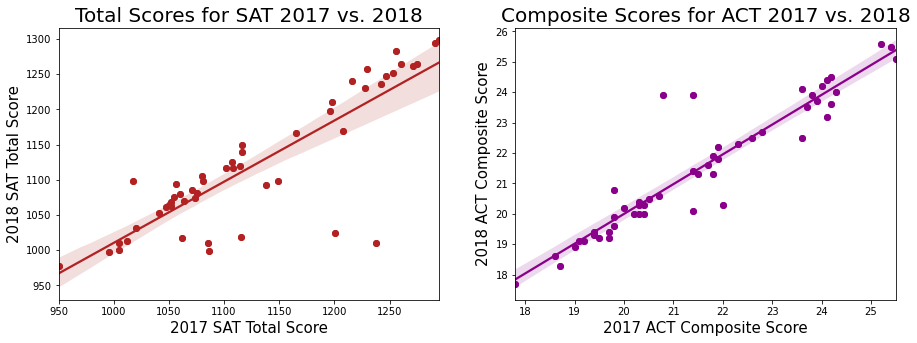

In [88]:
plt.figure(figsize=(15,5))

# Total scores for SAT 2017 vs. 2018
plt.subplot(1,2,1)
plot_scatter(df=final, 
             x='sat_total_17', 
             y='sat_total_18', 
             title='Total Scores for SAT 2017 vs. 2018', 
             xlabel='2017 SAT Total Score', 
             ylabel='2018 SAT Total Score', 
             color='firebrick')

# Composite scores for ACT 2017 vs. 2018
plt.subplot(1,2,2)
plot_scatter(df=final, 
             x='act_composite_17', 
             y='act_composite_18', 
             title='Composite Scores for ACT 2017 vs. 2018', 
             xlabel='2017 ACT Composite Score', 
             ylabel='2018 ACT Composite Score',
             color='darkmagenta')

|**Observation**|

- Both the ACT and SAT shows the positive linear relationship between year-to-year scores. 

- There are some states where SAT scores are below theregression line, it suggested that the  total scores worsen in 2018 compared to the prior year.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [89]:
def plot_boxplot(dataframe, list_of_columns, title, list_of_colors):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5))
    plt.title(title, fontsize=15)
    ax = sns.boxplot(data=final[list_of_columns])
    for i, column in enumerate(list_of_columns): 
        ax.artists[i].set_facecolor(list_of_colors[i])

In [90]:
# To plot boxplots in subplots
def plot_boxplot_subplots(dataframe, list_of_columns, title, list_of_colors, plot_position):
    sns.set_style('whitegrid')
    ax[plot_position].set_title(title,fontsize=17)
    box_plot = sns.boxplot(data=final[list_of_columns], ax=ax[plot_position])
    for i, column in enumerate(list_of_columns): 
        box_plot.artists[i].set_facecolor(list_of_colors[i])

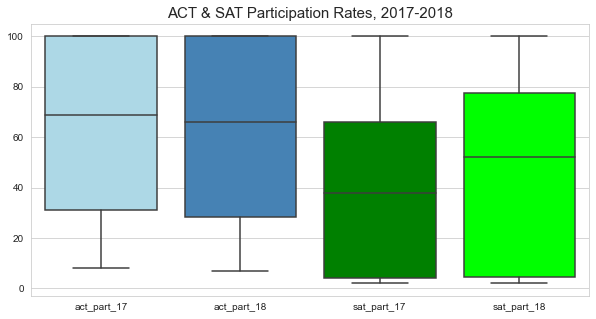

In [91]:
#Participation
plot_boxplot(dataframe=final,
             list_of_columns=['act_part_17','act_part_18','sat_part_17','sat_part_18'],
             title='ACT & SAT Participation Rates, 2017-2018',
             list_of_colors=['lightblue', 'steelblue', 'green', 'lime'])

|**Observation**|

- The median participation of ACT is > 65% which is much higher than that of the SAT. 
- ACT's year-to-year distribution looks fairly similar.
- SAT participation rate has improved with median participation rate rose from 38% in 2017 to 52% in 2018. 
- This could be a result of more States making it mandatory to take SAT.

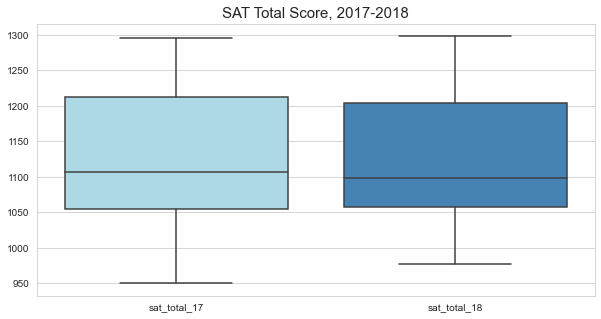

In [92]:
plot_boxplot(dataframe=final,
             list_of_columns=['sat_total_17','sat_total_18'],
             title='SAT Total Score, 2017-2018',
             list_of_colors=['lightblue', 'steelblue'])

|**Observation**|
- Not much distinctive change in the  distribution of the SAT total scores between 2017 and 2018, 
- There is very slight improvement in minimum score and slight dip in 75% quarantile score. 

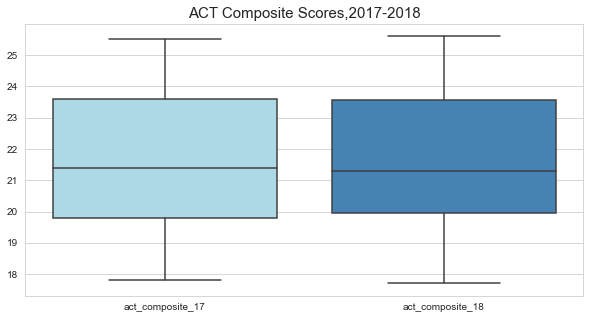

In [93]:
# ACT Composite
plot_boxplot(dataframe=final,
             list_of_columns=['act_composite_17','act_composite_18'],
             title='ACT Composite Scores,2017-2018',
             list_of_colors=['lightblue', 'steelblue'])

|**Observation**|
- Not much distinctive change in the  distribution of the ACT composite scores between 2017 and 2018, 
- There is very slight improvement in 25% quarantile score 

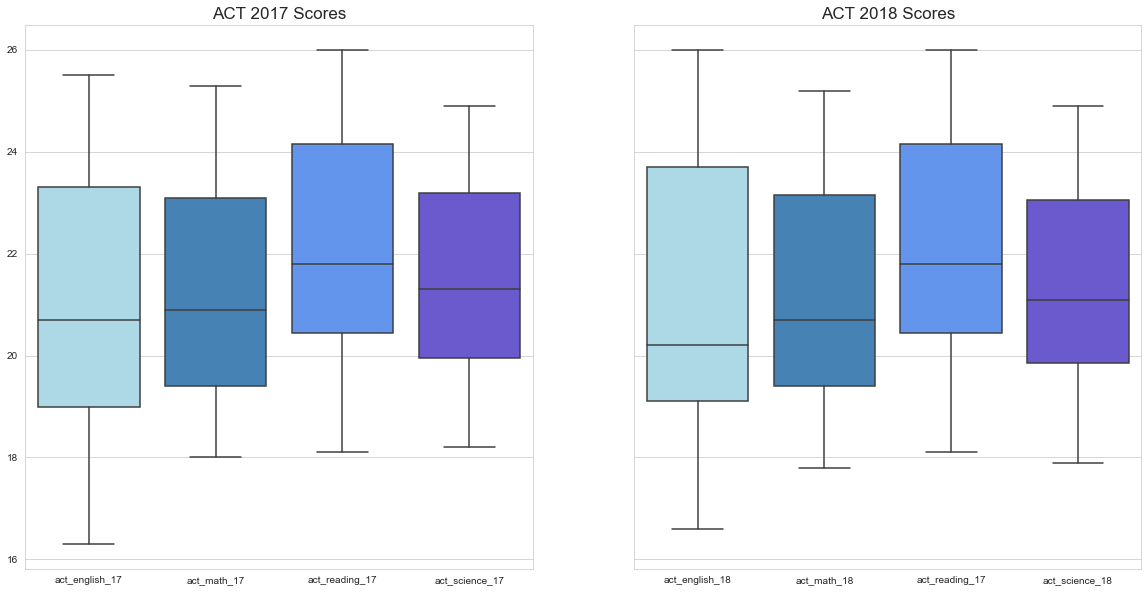

In [94]:
#ACT subjects
fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=True)
plot_boxplot_subplots(dataframe=final,
                     list_of_columns=['act_english_17', 'act_math_17', 'act_reading_17', 'act_science_17'],
                     title='ACT 2017 Scores',
                     list_of_colors=['lightblue', 'steelblue', 'cornflowerblue', 'slateblue'],
                     plot_position=0)
plot_boxplot_subplots(dataframe=final,
                     list_of_columns=['act_english_18', 'act_math_18', 'act_reading_17', 'act_science_18'],
                     title='ACT 2018 Scores',
                     list_of_colors=['lightblue', 'steelblue', 'cornflowerblue', 'slateblue'],
                     plot_position=1)

|**Observations**|
- The ACT English test has a much wider spread of scores than other subjects.
- Minimum scor for Math, Reading and Science seems higher than English. Lowest score seen on the English test was
   between 16-17 in 2017 and 2018 whereas Math,Reading and Science were aroung 18.  
- The median English score fell in 2018 compared to 2017, the score at the 75 percentile improved in 2018. 
-  The median score on Reading was the best out of all the subjects, suggesting students excelled more verbally than on critical thinking (Math and Science) or written English.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [95]:
# Exploring the ACT and SAT participation rate in 2017 and 2018

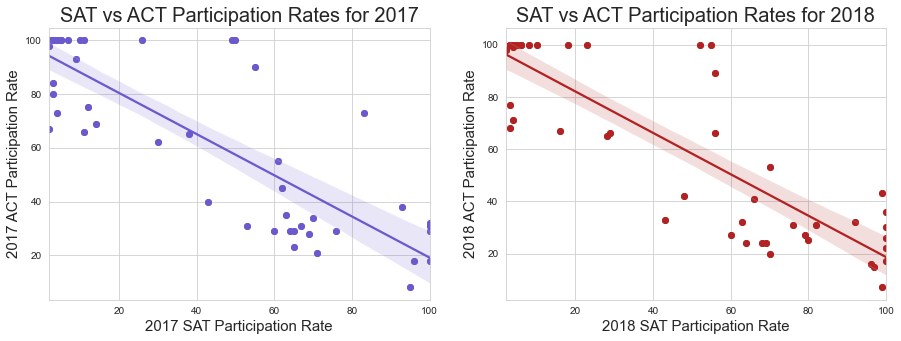

In [96]:
plt.figure(figsize=(15,5))

# SAT vs. ACT Participation Rates for 2017
plt.subplot(1,2,1)
plot_scatter(df=final, 
             x='sat_part_17', 
             y='act_part_17', 
             title='SAT vs ACT Participation Rates for 2017', 
             xlabel='2017 SAT Participation Rate', 
             ylabel='2017 ACT Participation Rate',
             color='slateblue')

# SAT vs. ACT Participation Rates for 2018
plt.subplot(1,2,2)
plot_scatter(df=final, 
             x='sat_part_18', 
             y='act_part_18', 
             title='SAT vs ACT Participation Rates for 2018', 
             xlabel='2018 SAT Participation Rate', 
             ylabel='2018 ACT Participation Rate',
             color='firebrick')

|**Observations**|
- We can clearly see the negative linear relationship between SAT and ACT participation rate. 
- This is obvious as the exams are universally accepted by US colleges. Since both exams are designed to enable students to demonstrate college readiness, many will choose to take just one exam instead of both.
- Some states have chosen one of the two exams as mandatory and free for High school students, we will see a high participation rate in the required test and a low participation rate in the other test.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

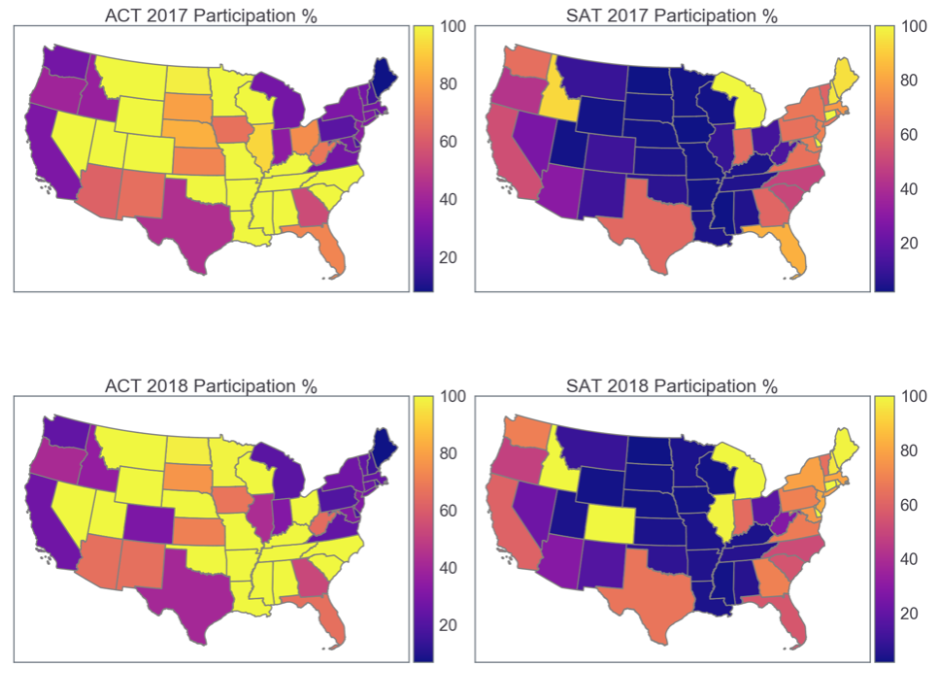

In [97]:
from IPython.display import Image
Image("../pic/Participation_rate.png")

|**Observation**|

- The participation rate is more apperant on the choropleth map, which visualizes relationships between variables over a geographic span. For this part of the analysis, we can see the mid west states participation rate of ACT is higher that SAT participation rate. 
- A quick glance confirms that for the 2017 year, states with low ACT Participation % had high SAT Participation % and vice versa. This is primarily the result of business contracts, in which the states designate the test of choice for the area. 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [98]:
#Participation
final[['sat_part_17', 'sat_part_18', 'act_part_17', 'act_part_18']].describe()


,sat_part_17,sat_part_18,act_part_17,act_part_18
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,45.745098,65.254902,61.647059
std,35.276632,37.314256,32.140842,34.080976
min,2.000000,2.000000,8.000000,7.000000
25%,4.000000,4.500000,31.000000,28.500000
50%,38.000000,52.000000,69.000000,66.000000
75%,66.000000,77.500000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000


**Participation Rate Statistic**

SAT: As observed, the median and spread has increased between 2017 and 2018. The central tendency of the distribution has shifted to the right with the mean increasing from 39.8 in 2017 to 45.7 in 2018 and the median increasing from 38 to 52. 

ACT: No significant change is observed in the participation rates between 2017 and 2018. The central tendencies did not differ much (2017 mean: 65.3, median: 69) vs (2018 mean: 61.6, median 66). The standard deviation remains fairly consistent between year to year.

As observed from the histograms, both the SAT and ACT participation rates have bimodal distributions. The two distinct peaks for the SAT are the 0-10 range and the 90-10 while the two peaks for the ACT are the 30-40 range and 90-100 range.

In [99]:
# 2017-2018 SAT
final[['sat_erw_17','sat_math_17', 'sat_total_17',
         'sat_erw_17','sat_math_18', 'sat_total_18']].describe()

,sat_erw_17,sat_math_17,sat_total_17,sat_erw_17,sat_math_18,sat_total_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039,569.117647,556.235294,1120.019608
std,45.666901,47.121395,92.494812,45.666901,47.772623,94.155083
min,482.000000,468.000000,950.000000,482.000000,480.000000,977.000000
25%,533.500000,523.500000,1055.500000,533.500000,522.500000,1057.500000
50%,559.000000,548.000000,1107.000000,559.000000,544.000000,1098.000000
75%,613.000000,599.000000,1212.000000,613.000000,593.500000,1204.000000
max,644.000000,651.000000,1295.000000,644.000000,655.000000,1298.000000


**SAT Score Statistics**

SAT Total: The median (2017: 1107, 2018: 1098) is lower than the mean (2017: 1126, 2018: 1120), suggesting that there  is slight right skewed. No significant changes were observed in the central tendency, spread and shape of the distribution between the years.

SAT Sections: We can see from the histogram, both the EBRW and Math scores have bimodal distributions. The median score on the EBRW test (2017: 559, 2018: 552) is slightly better than that for Math (2017: 548, 2018: 544) in both years.
The spread for Math scores is also wider than that of the EBRW, indicating a wider range of low and high scorers on the Math test than EBRW.

In [100]:
# 2017-2018 ACT
final[['act_english_17', 'act_math_17','act_reading_17', 'act_science_17', 'act_composite_17',
         'act_english_18', 'act_math_18','act_reading_18', 'act_science_18', 'act_composite_18']].describe()

,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,act_english_18,act_math_18,act_reading_18,act_science_18,act_composite_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.450980,21.519608,20.988235,21.125490,22.015686,21.345098,21.486275
std,2.353677,1.981989,2.067271,1.739353,2.020695,2.446356,2.035765,2.167245,1.870114,2.106278
min,16.300000,18.000000,18.100000,18.200000,17.800000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,19.000000,19.400000,20.450000,19.950000,19.800000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,20.700000,20.900000,21.800000,21.300000,21.400000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,23.300000,23.100000,24.150000,23.200000,23.600000,23.700000,23.150000,24.100000,23.050000,23.550000
max,25.500000,25.300000,26.000000,24.900000,25.500000,26.000000,25.200000,26.100000,24.900000,25.600000


**ACT Score Statistics**

ACT Composite: The ACT composite scores from 2017 and 2018 are comparable. We do not obserce shift in the central tendency, spread and shape of the distribution between the years.

ACT Sections: The median scores for Reading are the highest, followed by Science, Math and then English. Although the median English score fell from 20.7 in 2017 to 20.2 in 2018, the score at the 75 percentile rose from 23.3 to 23.7. This suggests a widening gap between the stronger and weaker students for English.

 #### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No, we observe a bimodal distribution instead of a normal distribution. Since each sample that we have collected is representative of each respective state. As the sample was not randomly selected from the population, we cannot apply CLT here.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
We cannot apply CLT to Math, Reading and Rates as the samples collected are not randomly selected from the full population. The Score/Rates from each state is highly dependent on whether it was compulsory for all students in that particular state to sit for the test. Hence, in States where testing is not enforced, students that are self-motivated will sign up for the test and be well prepared for it. This selection bias will result in a large proportion of high scorers.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes, we can conduct a statistical inference using hypothesis testing. 
The null hypothesis would be that there is no relationship between SAT and ACT participation rates.
The alternative hypothesis is that there is a relationship between SAT and ACT participation rates.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: It is not appropriate to compare SAT and ACT math scores as these tests are graded on different scales (SAT: 200-800 and ACT 1-36). We cannot compare Math test score of SAT and ACT so we cannot say students scoring well at SAT will do well at ACT.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [101]:
# H0: The difference between 2017 SAT total score and 2018 SAT total score is 0
# H1: The difference between 2017 SAT total score and 2018 SAT total score is not 0
# alpha =0.05

# Conduct a t-test
t_statistics, p_value = stats.ttest_ind(final['sat_total_17'], final['sat_total_18'])
p_value

0.7429288943265793

As p-value>=α, there is insufficient evidence to reject the null hypothesis. Hence, there is no statistical difference between 2017 SAT total and 2018 SAT total performance.

In [102]:
# H0: The difference between 2017 SAT participation rates and 2018 SAT participation rates is 0
# H1: The difference between 2017 SAT participation rates and 2018 SAT participation rates is not 0

# Conduct a t-test
t_statistics, p_value = stats.ttest_ind(final['sat_part_17'], final['sat_part_18'])
p_value

0.4106208015719349

As p-value>=α, there is insufficient evidence to reject the null hypothesis. Hence, there is no statistical difference between 2017 SAT participation and 2018 SAT participation.

In [103]:
# H0: The difference between 2017 ACT participation rates and 2018 ACT participation rates is 0
# H1: The difference between 2017 ACT participation rates and 2018 ACT participation rates is not 0

# Conduct a t-test
t_statistics, p_value = stats.ttest_ind(final['act_part_17'], final['act_part_18'])
p_value

0.5835477949005097

As p-value>=α, there is insufficient evidence to reject the null hypothesis. Hence, there is no statistical difference between 2017 ACT participation and 2018 ACT participation.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [104]:
# To find the biggest shifts in ACT participation
act_part_diff = final['act_part_18'] - final['act_part_17']
act_part_diff.sort_values().head()

state
Colorado   -70.0
Illinois   -50.0
Alaska     -32.0
Florida     -7.0
Michigan    -7.0
dtype: float64

In [105]:
# To find the biggest shifts in SAT participation
sat_part_diff = final['sat_part_18'] - final['sat_part_17']
sat_part_diff.sort_values(ascending=False).head()

state
Illinois         90.0
Colorado         89.0
Rhode Island     26.0
West Virginia    14.0
New Jersey       12.0
dtype: float64

 ####  Illinois, Colorado and Alaska have drastic change in the participation rate. 

In [106]:
final.loc[['Colorado','Illinois','Alaska'],['act_part_17','act_part_18','sat_part_17','sat_part_18']]

,act_part_17,act_part_18,sat_part_17,sat_part_18
state,,,,
Colorado,100.0,30,11.0,100.0
Illinois,93.0,43,9.0,99.0
Alaska,65.0,33,38.0,43.0


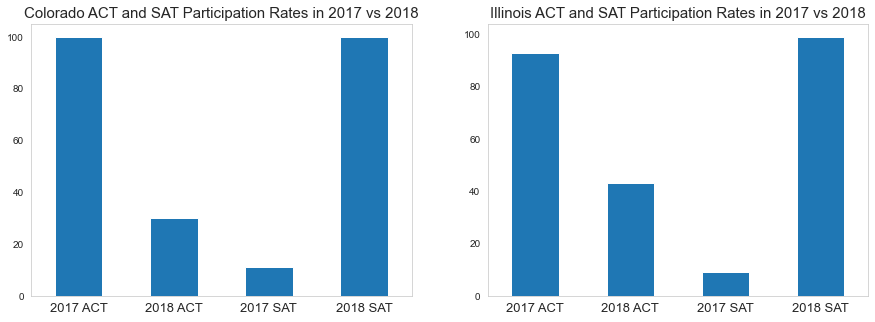

In [107]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid", {'axes.grid' : False})
# Colorado
plt.subplot(1,2,1)
final.loc['Colorado',['act_part_17','act_part_18','sat_part_17','sat_part_18']].plot(kind='bar')
plt.title("Colorado ACT and SAT Participation Rates in 2017 vs 2018", fontsize='15')
plt.xticks([0,1,2,3],labels=['2017 ACT','2018 ACT','2017 SAT','2018 SAT'],rotation=0,fontsize=13)
# Illinois
plt.subplot(1,2,2)
final.loc['Illinois',['act_part_17','act_part_18','sat_part_17','sat_part_18']].plot(kind='bar')
plt.title("Illinois ACT and SAT Participation Rates in 2017 vs 2018", fontsize='15')
plt.xticks([0,1,2,3],labels=['2017 ACT','2018 ACT','2017 SAT','2018 SAT'],rotation=0,fontsize=13);

Colorado

Colorado's ACT participation fell from 100% in 2017 to 30% in 2018 while its SAT participation increased significantly from 11% to 100%. https://blog.prepscholar.com/which-states-require-the-sat
This happened because Colorado had mandated every high school junior to take the ACT as their 11th grade college entrance exam up till 2017. However, the state made the switch from ACT to SAT in 2018. This meant that all high school juniors were required to take SAT instead, for which the state covered the cost.

The state decided to transition from the ACT to SAT as they felt that the SAT is better aligned to Colorado's Academic Standards. The SAT measures critical thinking and analytical reasoning, which is crucial for college and career readiness.

Illinois

Illinois too made the switch from ACT to SAT in 2018. https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html. ACT participation rate dipped from 93% in 2017 to 43% in 2018 while its SAT participation rate increased significantly from 9% to 99% over the same period. As the state's contract with the ACT ended in mid 2016, the Illinois State Board of Education had reviewed both exams and decided that the SAT was better aligned with its state's standards.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

|**Takeaways**|:
- There is drastic increase in SAT participation rate in two states Colorado and Illinois.
- Colorado and Illinois switched from ACT Testing to mandatory SAT Testing in Spring 2017.
- This was due to statewide high school accountability and every student in those states is now required to participate in SAT Testing.
- There is an inverse relationship between the ACT and SAT participation rates. States that administer a particular test will result in a low participation rate in the other.
- There are strong regional (and possibly political) affiliations associated with ACT versus SAT preference. Coastal progressive states tend to favor the SAT, while Midwestern and Mountain conservative states tend to favor the ACT.

|**Recommendations**|:
 - Improve access for US States to SAT School Day Programs
 - Improve access to free preparation material for students
 - In order to increase SAT participation rates, the College Board can pitch to states that will soon see 
   their ACT statewide contract due for renewal.
 - Cost-saving incentives for state boards, public schools, and public students..
 - Standardised testing is a mandatory requirement for high school graduates in Ohio. Unlike most states that administer   only the ACT or the SAT, high schools in Ohio are given the flexibility to choose between administering the ACT or the SAT. This presents the College Board with the opportunity to persuade individual school districts in Ohio to switch from ACT to SAT. 
 - The strategy is to slowly garner support from the local school districts to administer the SAT. Furthermore, as Ohio is also the 7th most populous state in the US, getting some schools to switch to the SAT would help to increase the SAT participation in absolute terms.
